# ABHITEJA ACHANTA
# MS Capstone

# Topic:
# Multiclass Text Classification

## Context

Text sentiment analysis is an important research topic for its wide applicability in real-world applications, and recent breakthroughs in text embedding and classification models led to state-of-the-art results. This project aims to apply recent innovations in machine learning to multi-class sentiment analysis of Amazon reviews.

## Objective

Our objective is to build a multi class text classification model that is capable of predicting one of the three (positive,neutral and negative) sentiment classes given an Amazon review.

## Data Description

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

Data Source:
- Kaggle

## Import required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import pickle
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Conv1D,Flatten,Dropout,MaxPooling1D,GlobalMaxPooling1D
from keras.models import load_model
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Load the Dataset into Dataframe

In [4]:
data = pd.read_csv("Reviews.csv")

## Glimpse of dataset

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.shape

(568454, 10)

In [7]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

- This dataset has 568454 observations.
- It has 10 columns which has user,product information, review text ,summary and numerical rating.
- All the available columns are not necessary for this project goal. Therefore, we will carry out data wrangling tasks to get the data to required format.

## Data Wrangling

In [8]:
data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Time'],axis=1,inplace=True)

In [9]:
data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


- I removed unwanted columns and kept review text ,score for our project goal.
- I kept summary column to experiment about text summarization if I have time after the sentiment analysis. 

### Missing value analysis

In [10]:
data.isnull().sum()

Score       0
Summary    27
Text        0
dtype: int64

- Summary column has 27 missing values.
- Let's have a look at the missing rows.

In [11]:
data[data['Summary'].isnull()]

,Score,Summary,Text
33958,2,NaN,I only used two maybe three tea bags and got p...
40548,2,NaN,I only used two maybe three tea bags and got p...
101106,2,NaN,I only used two maybe three tea bags and got p...
102979,2,NaN,I only used two maybe three tea bags and got p...
117515,2,NaN,I only used two maybe three tea bags and got p...
155712,2,NaN,I only used two maybe three tea bags and got p...
178290,2,NaN,I only used two maybe three tea bags and got p...
198474,2,NaN,I only used two maybe three tea bags and got p...
212691,2,NaN,I only used two maybe three tea bags and got p...
237565,3,NaN,This is a cool system only problem is that the...


- From the above output, we can infer that there are only 2 unique rows among the 27 missing values.
- 27 observations in 568454 observations is very less percentage. Hence, I am removing these rows from the dataset.
- We can also infer that there are duplicate observations in the dataset from the above output. Hence, we will remove them in next steps.

In [12]:
data1 = data[data['Summary'].notnull()].reset_index(drop=True)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568427 entries, 0 to 568426
Data columns (total 3 columns):
Score      568427 non-null int64
Summary    568427 non-null object
Text       568427 non-null object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


In [14]:
data_clean = data1.drop_duplicates()

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395003 entries, 0 to 568426
Data columns (total 3 columns):
Score      395003 non-null int64
Summary    395003 non-null object
Text       395003 non-null object
dtypes: int64(1), object(2)
memory usage: 12.1+ MB


- After removing duplicates and missing values, we are left with 395003 observations in the dataset.
- Let us explore the score column in the dataset.

In [16]:
data_clean['Score'].value_counts()

5    251604
4     56207
1     36505
3     29842
2     20845
Name: Score, dtype: int64

In [17]:
data_clean.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


- Numerical ratings are spread from 1(very bad) to 5(very good) for the products.
- I will label all the scores less than 3 as 0(negative), ratings with score 3 as 1(neutral) and greater than 3 as 2(positive).
- Hence, our response variable will have 3 classes.

In [18]:
def convert_score(x):
    if x<=2:
        return 0
    elif x==3:
        return 1
    else:
        return 2

In [19]:
data_clean['Score'] = data_clean['Score'].apply(lambda x: convert_score(x))

In [20]:
data_clean.head()

,Score,Summary,Text
0,2,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,"""Delight"" says it all",This is a confection that has been around a fe...
3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,2,Great taffy,Great taffy at a great price. There was a wid...


- Since, this is a huge dataset and taking hours to train Machine Learning models, I am downsizing the dataset with the same proportion of Positive, Negative and Nuetral Sentiments.

In [21]:
data_clean2=data_clean.copy()

In [22]:
train,test = train_test_split(data_clean2,stratify=data_clean2['Score'],test_size=0.3)

In [23]:
data_clean=test.reset_index(drop=True)

In [24]:
data_clean['Score'].value_counts()

2    92343
0    17205
1     8953
Name: Score, dtype: int64

## Exploratory Data Analysis

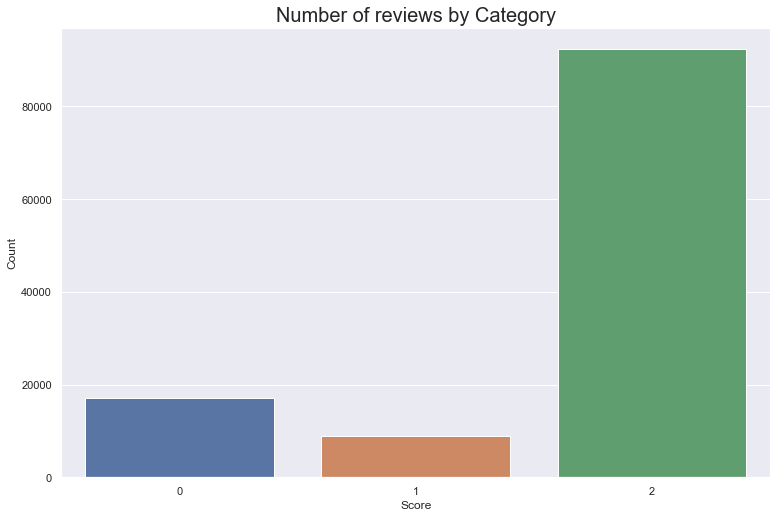

In [25]:
reviews_by_category=pd.DataFrame(data_clean['Score'].value_counts()).reset_index().rename(columns={'index':'Score','Score':'Count'})
sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.title("Number of reviews by Category",fontsize=20)
ax=sns.barplot(x='Score',y='Count',data=reviews_by_category)

- Most of the reviews are positive.
- From the above chart, we can confirm this is highly imbalanced dataset.
- We can use techniques like undersampling or over sampling to deal with this issue.

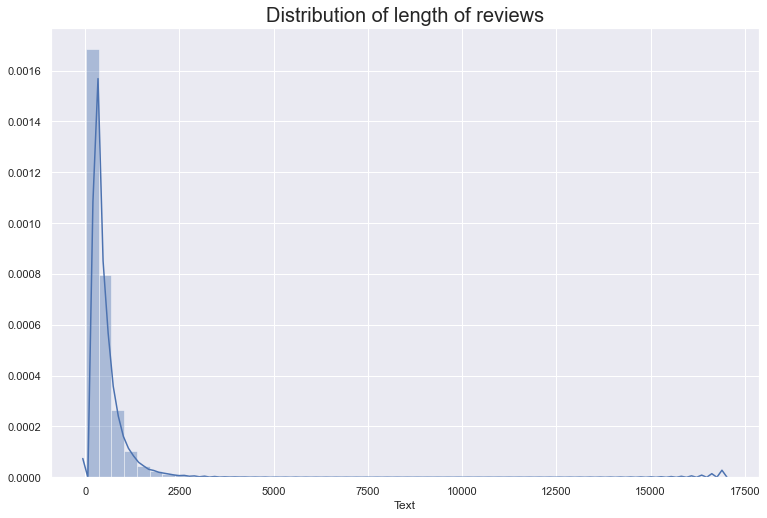

In [26]:
Comment_length=data_clean['Text'].str.len()
plt.title("Distribution of length of reviews",fontsize=20)
sns.distplot(Comment_length)

- We can observe that above distribution is right skewed.

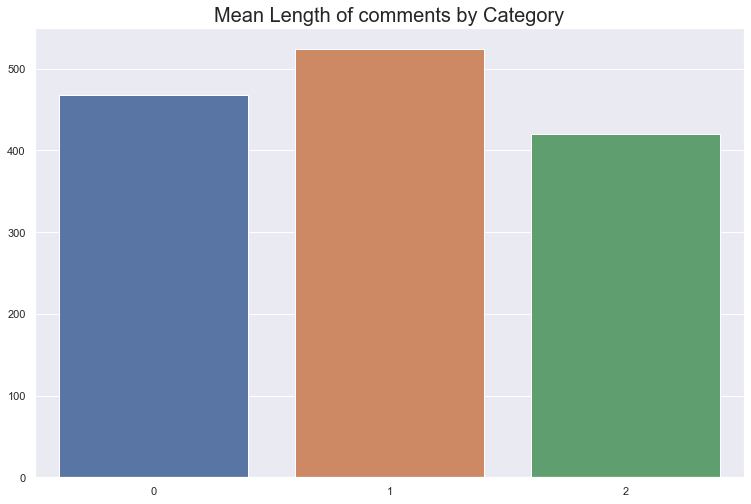

In [27]:
mean_length = dict()
for i in range(3):
    mean_length[i]=data_clean[data_clean['Score']==i]['Text'].str.len().mean()
sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.title("Mean Length of comments by Category",fontsize=20)
ax=sns.barplot(x=list(mean_length.keys()),y=list(mean_length.values()))

- Length of neutral reviews is longer on average compared to positive,negative reviews.

### Word clouds

- Word clouds are the best way to identify the type of words present in each class.
- Therefore, we build word clouds for all the categories present below. 

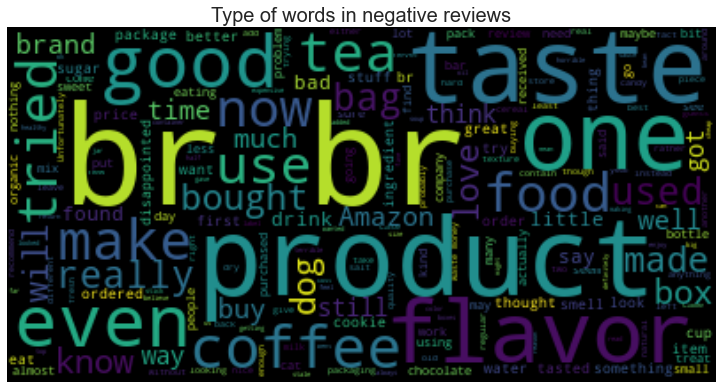

In [35]:
score0_reviews = data_clean[data_clean['Score']==0]
score0_text=" ".join([i for i in score0_reviews['Text'].values])
wordcloud = WordCloud(stopwords=STOPWORDS).generate(score0_text)
plt.title("Type of words in negative reviews", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

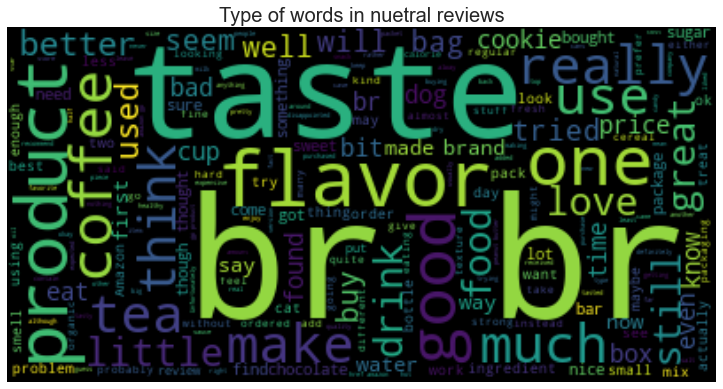

In [36]:
score1_reviews = data_clean[data_clean['Score']==1]
score1_text=" ".join([i for i in score1_reviews['Text'].values])
wordcloud = WordCloud(stopwords=STOPWORDS).generate(score1_text)
plt.title("Type of words in nuetral reviews", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

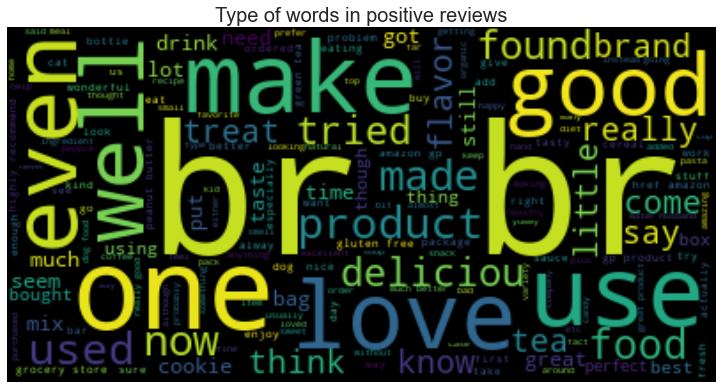

In [37]:
score2_reviews = data_clean[data_clean['Score']==2]
score2_text=" ".join([i for i in score2_reviews['Text'].values])
wordcloud = WordCloud(stopwords=STOPWORDS).generate(score2_text)
plt.title("Type of words in positive reviews", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Cleaning

In [28]:
data_clean.head()

,Score,Summary,Text
0,2,LOVE IT!!! REALLY PERKS UP A SANDWICH!!! GREA...,"I had bought the chipotle mayo a while back, a..."
1,0,gross,It looked and smelled really bad could not get...
2,0,Not for children--but works well,I bought one of these and one of the mana poti...
3,2,EXCELLENT PRODUCT EXCELLENT PRICE,This K Cups by Timothy's World Coffee is fanta...
4,1,A Bit On The Sweet Side,At first taste I found these cloyingly sweet. ...


- We will have a look at couple of comments from each category to understand what data cleaning steps has to be carried out.

In [29]:
print("Negative review:")
print(data_clean[data_clean.Score==0].iloc[3,2])

Negative review:
Quinn popcorn has the right idea.  Straight popcorn in a biodegradable bag with no chemicals, additives etc.  After popping the corn, flavor is added by adding oil and a flavor and shaking the bag.  It should be heavenly.  But in fact the parmesan had the consistency of flour and just coated my mouth.  And I shook that bag a lot.  I would recommend mixing everything in a bowl instead of the bag; that might help.  The idea is terrific.  However I think better results could be obtained by popping plain corn in a brown paper bag and adding fresh grated parmesan and a bit of oil.  Perhaps the other two flavors would be better but I just tried parmesan and rosemary.  It was disappointing and I so wanted to love it.


In [30]:
print("Neutral review:")
print(data_clean[data_clean.Score==1].iloc[4,2])

Neutral review:
It sounds like this is good and it is.  I would rate it slightly higher than the cheeseburger mac that hamburger helper does.  However, it should not go unnoticed that on sale at the grocery, HH is often a dollar or less per box. The price on this item on the Zon here is pretty far out there, so from that perspective add a star if you find this in the grocery or a good online sale.  Subtract one if you are going to buy it on some of the high prices it's offered for here.<br /><br />I'll give Kraft credit here for saving their brand name for me and doing a set of quality items in the package. The taste combined with my drained washed and reseasoned ground beef was very good.  I like to add a little red wine, some mushrooms and some half and half to the sauce on these to give them a classier taste.  The cheese held up well. I took exception to those eazy mac things they did up a few years ago.  I can't imagine anyone liking them unless they were starving!  The question I 

In [31]:
print("Positive review:")
print(data_clean[data_clean.Score==2].iloc[5,2])

Positive review:
This is a great item! Perhaps it is a little small in quantity, but the end taste is great. It may be a little expensive too, but, personally, I like this candy.


From the above comments, some of the data cleaning steps that need to be done are:
- Converting entire text into Lowercase to avoid considering single word as two different words.
- Remove new line characters.
- Converting words like don't to do not using custom dictionary.
- Remove all the html tags like the one in the above neutral review.
- Remove all the punctuation marks.
- Remove all the numeric characters from the text.
- Remove the stop words like a,the etc for the better performance of model.
- Carry out lemmetization to convert word like rocks to rock.

In [32]:
# Custom dictionary

abbv = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [33]:
def clean_text(data):
    
    #Convert to Lower case
    data.loc[:,'Text'] = data['Text'].apply(lambda x: x.lower())
    
    #Remove new line \n
    data.loc[:,'Text'] = data['Text'].apply(lambda x: x.replace("\n"," "))
    
    #Remove html tags
    data.loc[:,'Text'] = data['Text'].apply(lambda x: re.sub(r'<.*?>',' ',x))
    
    #Get abbrevations from custom dictionary above
    data.loc[:,'Text'] = data['Text'].apply(lambda x: " ".join([abbv.get(i,i) for i in x.split()]))
    
    #Remove punctuations
    data.loc[:,'Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    #Remove numeric values from text
    data.loc[:,'Text'] = data['Text'].apply(lambda x: re.sub(r'[\d]',' ',x))
    
    #Removing Stop words
    data.loc[:,'Text'] = data['Text'].apply(lambda x: " ".join([i.strip() for i in x.split() if i not in stop_words]))
    
    #Lemmatization
    data.loc[:,'Text'] = data['Text'].apply(lambda x: " ".join([lemma.lemmatize(i, "v") for i in x.split()]))
    
    return data

In [34]:
print("Text before cleaning:")
data_clean[data_clean.Score==1].iloc[4,2]

Text before cleaning:


"It sounds like this is good and it is.  I would rate it slightly higher than the cheeseburger mac that hamburger helper does.  However, it should not go unnoticed that on sale at the grocery, HH is often a dollar or less per box. The price on this item on the Zon here is pretty far out there, so from that perspective add a star if you find this in the grocery or a good online sale.  Subtract one if you are going to buy it on some of the high prices it's offered for here.<br /><br />I'll give Kraft credit here for saving their brand name for me and doing a set of quality items in the package. The taste combined with my drained washed and reseasoned ground beef was very good.  I like to add a little red wine, some mushrooms and some half and half to the sauce on these to give them a classier taste.  The cheese held up well. I took exception to those eazy mac things they did up a few years ago.  I can't imagine anyone liking them unless they were starving!  The question I have on this pr

In [35]:
data_clean1 = data_clean.copy()

In [36]:
print("Text after cleaning:")
data_final=clean_text(data_clean1)
data_final[data_final.Score==1].iloc[4,2]

Text after cleaning:


'sound like good would rate slightly higher cheeseburger mac hamburger helper however go unnoticed sale grocery hh often dollar less per box price item zon pretty far perspective add star find grocery good online sale subtract one go buy high price offer I give kraft credit save brand name set quality items package taste combine drain wash reseasoned grind beef good like add little red wine mushroom half half sauce give classier taste cheese hold well take exception eazy mac things years ago cannot imagine anyone like unless starve question product yes improvement hh much much different send pre cook grind beef could heat would something get compete especially price'

In [37]:
data_final[data_final.Score==2].iloc[5,2]

'great item perhaps little small quantity end taste great may little expensive personally like candy'

In [38]:
data_final.head()

,Score,Summary,Text
0,2,LOVE IT!!! REALLY PERKS UP A SANDWICH!!! GREA...,buy chipotle mayo back good decide try garlic ...
1,0,gross,look smell really bad could get self taste sor...
2,0,Not for children--but works well,buy one one mana potions fun go trip meet frie...
3,2,EXCELLENT PRODUCT EXCELLENT PRICE,k cup timothy world coffee fantastic great fla...
4,1,A Bit On The Sweet Side,first taste find cloyingly sweet taste bud adj...


## Feature engineering using Count vectorizer,TF-IDF and Word2Vec

In [39]:
data_final.drop('Summary',axis=1,inplace=True)
data_final.head()

,Score,Text
0,2,buy chipotle mayo back good decide try garlic ...
1,0,look smell really bad could get self taste sor...
2,0,buy one one mana potions fun go trip meet frie...
3,2,k cup timothy world coffee fantastic great fla...
4,1,first taste find cloyingly sweet taste bud adj...


In [40]:
data_final=data_final[data_final['Text']!='']

In [41]:
X=data_final['Text']
y=data_final['Score']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [43]:
#Count vectorizer
cnt_vec = CountVectorizer(max_features=10000, min_df=5, max_df=0.7,stop_words='english',ngram_range=(1,2))

In [44]:
X_train_cnt = cnt_vec.fit_transform(X_train)
X_test_cnt = cnt_vec.transform(X_test)

In [45]:
#TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(max_features=10000, min_df=5, max_df=0.7, stop_words='english',ngram_range=(1,2))

In [46]:
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [47]:
#Word2Vec
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [48]:
model = KeyedVectors.load_word2vec_format('C:\\Users\\abhi1\\gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', binary=True)

In [49]:
model.init_sims(replace=True)

In [50]:
vocab = model.vocab.keys()
wordsInVocab = len(vocab)

In [51]:
clean_train_reviews = []
for review in X_train:
    clean_train_reviews.append(review.split())

In [52]:
clean_test_reviews = []
for review in X_test:
    clean_test_reviews.append(review.split())

In [53]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [54]:
X_train_vectorized = np.zeros((len(clean_train_reviews), 300))
num=0
for index,sentence in enumerate(clean_train_reviews):
    X_train_vectorized[index,:]=sent_vectorizer(sentence, model)
    num+=1
    if num%10000==0:
        print(str(num)+": reviews") 

10000: reviews
20000: reviews
30000: reviews
40000: reviews
50000: reviews
60000: reviews
70000: reviews
80000: reviews


In [55]:
X_train_vectorized_df = pd.DataFrame(X_train_vectorized)
X_train_vectorized_df.shape

(88875, 300)

In [56]:
X_test_vectorized=np.zeros((len(clean_test_reviews), 300))
num=0
for index,sentence in enumerate(clean_test_reviews):
    X_test_vectorized[index,:]=sent_vectorizer(sentence, model)
    num+=1
    if num%10000==0:
        print(str(num)+": reviews")
X_test_vectorized_df = pd.DataFrame(X_test_vectorized)
X_test_vectorized_df.shape

10000: reviews
20000: reviews


(29626, 300)

In [57]:
model.most_similar('Analytics')

[('analytics', 0.6786240935325623),
 ('Text_Analytics', 0.5867035388946533),
 ('predictive_analytics', 0.5806295871734619),
 ('Optimization', 0.5765899419784546),
 ('analytic_tools', 0.5712772011756897),
 ('Interwoven_Segmentation', 0.5704681277275085),
 ('TRX_Travel', 0.5701073408126831),
 ('Metrics', 0.5599101185798645),
 ('Chmura_Economics', 0.5578213930130005),
 ('Performance_Dashboards', 0.5563361048698425)]

In [58]:
print(model.similarity('ML', 'AI'))

0.17006790941109276


# Model Building and Evaluation

## Baseline Classifier

In [59]:
data_final[data_final['Score']==2].shape[0]/data_final.shape[0]

0.7792592467574113

- In order to fix a baseline to be conscious about whether we are developing useful models or not, a baseline classifier that always predicted the majority class would be the simplest classifier we could build.

- The majority class represents a 77% of the whole dataset. For that reason, that would be the accuracy of a majority class classifier.

## Machine Learning Algorithms

In [60]:
def model_build_evaluate(clf,x_train,y_train,x_test,y_test,classifier,Vectorizer,df):
    clf.fit(x_train,y_train)
    train_accuracy=clf.score(x_train,y_train)
    test_accuracy=clf.score(x_test,y_test)
    y_pred = clf.predict(x_test)
    f1score = f1_score(y_test,y_pred,average=None)
    f1score=[round(i,2) for i in f1score]
    print("Train accuracy of "+classifier+"Classifier with "+Vectorizer+" is "  + str(train_accuracy))
    print("Test  accuracy of "+classifier+"Classifier with "+Vectorizer+" is "  + str(test_accuracy))
    print("")
    print("Classification report is :")
    print(classification_report(y_test,y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12.8,6))
    sns.heatmap(cnf_matrix, annot=True,cmap="Blues",fmt='g',annot_kws={"size": 20})
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Confusion matrix')
    plt.show()
    df_length = len(df)
    df.loc[df_length] = [classifier,Vectorizer,train_accuracy,test_accuracy,f1score]
    return clf,df

In [61]:
classifier_comp = pd.DataFrame(columns = ['Classifier','Word Embeddings','Train Accuracy','Test Accuracy','f1 score'])

### Multinomial Naive Bayes

Train accuracy of Multinomial Naive BayesClassifier with Count Vectorizer is 0.8147735583684951
Test  accuracy of Multinomial Naive BayesClassifier with Count Vectorizer is 0.7946735975156957

Classification report is :
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4302
           1       0.26      0.37      0.30      2238
           2       0.92      0.86      0.89     23086

    accuracy                           0.79     29626
   macro avg       0.59      0.62      0.60     29626
weighted avg       0.82      0.79      0.81     29626



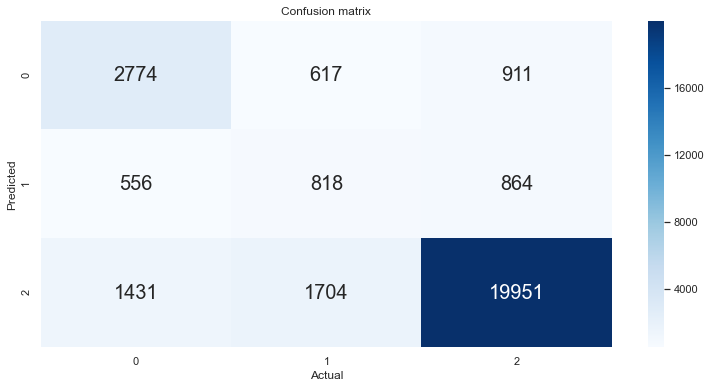

Train accuracy of Multinomial Naive BayesClassifier with TF-IDF Vectorizer is 0.8253727144866385
Test  accuracy of Multinomial Naive BayesClassifier with TF-IDF Vectorizer is 0.8200904610814825

Classification report is :
              precision    recall  f1-score   support

           0       0.82      0.32      0.46      4302
           1       0.51      0.01      0.02      2238
           2       0.82      0.99      0.90     23086

    accuracy                           0.82     29626
   macro avg       0.72      0.44      0.46     29626
weighted avg       0.80      0.82      0.77     29626



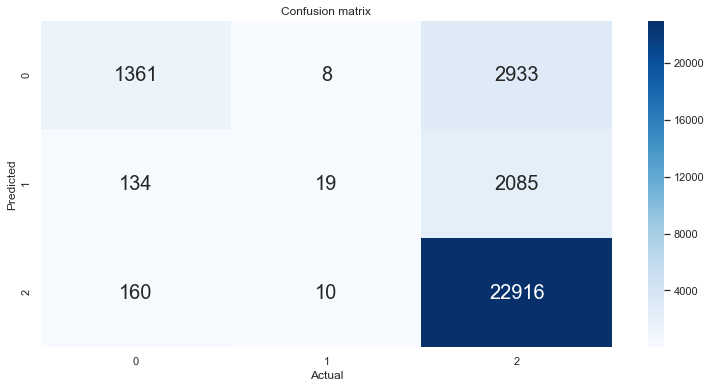

In [62]:
mnb_clf = MultinomialNB()

mnb_clf_cnt,classifier_comp = model_build_evaluate(mnb_clf,X_train_cnt,y_train,X_test_cnt,y_test,
                                              'Multinomial Naive Bayes','Count Vectorizer',classifier_comp)

mnb_clf_tfidf,classifier_comp = model_build_evaluate(mnb_clf,X_train_tfidf,y_train,X_test_tfidf,y_test,
                                              'Multinomial Naive Bayes','TF-IDF Vectorizer',classifier_comp)

### Logistic Regression

Train accuracy of Logistic RegressionClassifier with Count Vectorizer is 0.9015133614627285
Test  accuracy of Logistic RegressionClassifier with Count Vectorizer is 0.8434820765543779

Classification report is :
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      4302
           1       0.36      0.17      0.23      2238
           2       0.89      0.95      0.92     23086

    accuracy                           0.84     29626
   macro avg       0.65      0.58      0.60     29626
weighted avg       0.82      0.84      0.83     29626



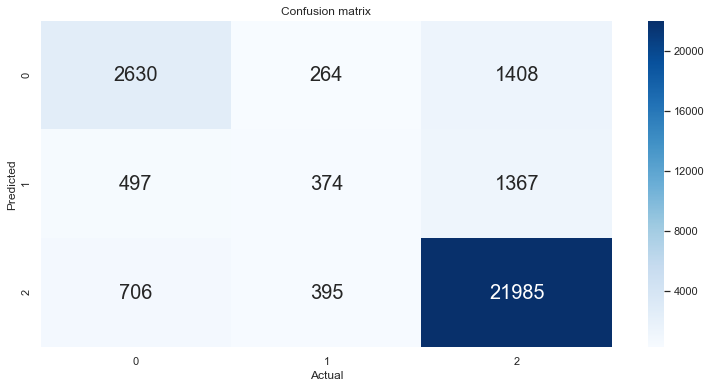

Train accuracy of Logistic RegressionClassifier with TF-IDF Vectorizer is 0.8673980309423347
Test  accuracy of Logistic RegressionClassifier with TF-IDF Vectorizer is 0.851819347870114

Classification report is :
              precision    recall  f1-score   support

           0       0.75      0.58      0.65      4302
           1       0.50      0.08      0.14      2238
           2       0.87      0.98      0.92     23086

    accuracy                           0.85     29626
   macro avg       0.70      0.55      0.57     29626
weighted avg       0.82      0.85      0.82     29626



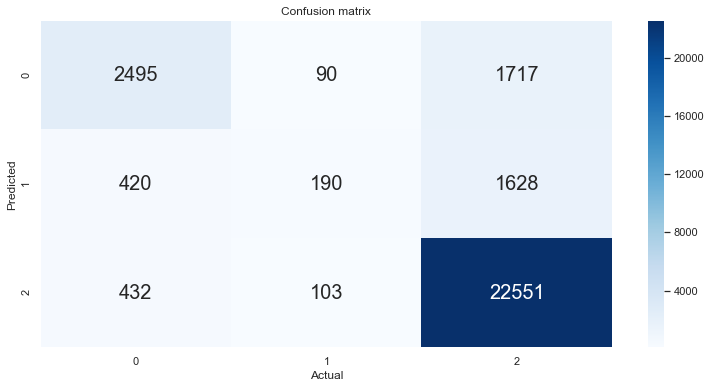

Train accuracy of Logistic RegressionClassifier with Word2Vec is 0.8202756680731365
Test  accuracy of Logistic RegressionClassifier with Word2Vec is 0.8199554445419563

Classification report is :
              precision    recall  f1-score   support

           0       0.69      0.38      0.49      4302
           1       0.34      0.01      0.01      2238
           2       0.83      0.98      0.90     23086

    accuracy                           0.82     29626
   macro avg       0.62      0.46      0.47     29626
weighted avg       0.77      0.82      0.77     29626



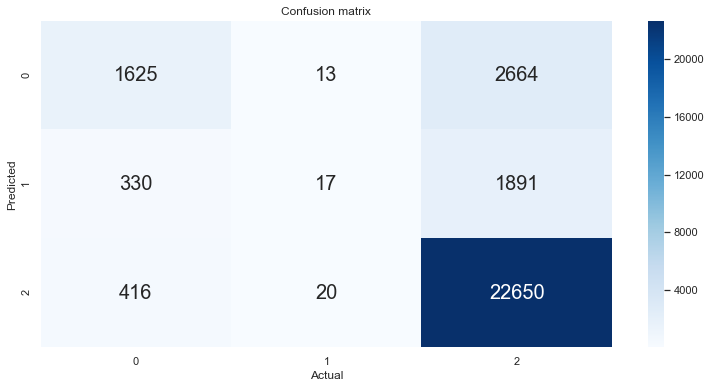

In [63]:
logreg_clf =LogisticRegression()

logreg_clf_cnt,classifier_comp = model_build_evaluate(logreg_clf,X_train_cnt,y_train,X_test_cnt,y_test,
                                              'Logistic Regression','Count Vectorizer',classifier_comp)

logreg_clf_tfidf,classifier_comp = model_build_evaluate(logreg_clf,X_train_tfidf,y_train,X_test_tfidf,y_test,
                                              'Logistic Regression','TF-IDF Vectorizer',classifier_comp)

logreg_clf_w2v,classifier_comp = model_build_evaluate(logreg_clf,X_train_vectorized_df,y_train,X_test_vectorized_df,y_test,
                                              'Logistic Regression','Word2Vec',classifier_comp)

### Random Forest

Train accuracy of Random ForestClassifier with Count Vectorizer is 0.992
Test  accuracy of Random ForestClassifier with Count Vectorizer is 0.815027340849254

Classification report is :
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      4302
           1       0.33      0.04      0.07      2238
           2       0.84      0.97      0.90     23086

    accuracy                           0.82     29626
   macro avg       0.60      0.47      0.49     29626
weighted avg       0.77      0.82      0.78     29626



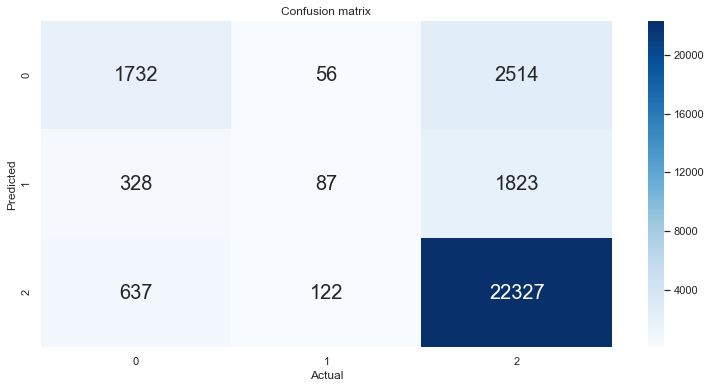

Train accuracy of Random ForestClassifier with TF-IDF Vectorizer is 0.9918762306610408
Test  accuracy of Random ForestClassifier with TF-IDF Vectorizer is 0.8182339836629987

Classification report is :
              precision    recall  f1-score   support

           0       0.68      0.38      0.49      4302
           1       0.36      0.03      0.06      2238
           2       0.83      0.98      0.90     23086

    accuracy                           0.82     29626
   macro avg       0.63      0.46      0.48     29626
weighted avg       0.78      0.82      0.78     29626



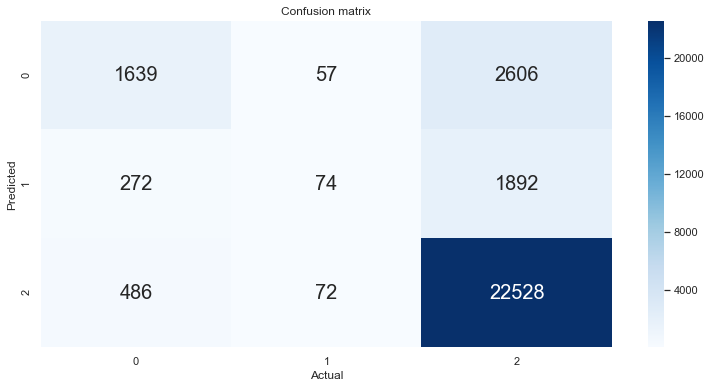

Train accuracy of Random ForestClassifier with Word2Vec is 0.9921350210970464
Test  accuracy of Random ForestClassifier with Word2Vec is 0.7774927428610005

Classification report is :
              precision    recall  f1-score   support

           0       0.46      0.21      0.29      4302
           1       0.14      0.02      0.04      2238
           2       0.81      0.96      0.88     23086

    accuracy                           0.78     29626
   macro avg       0.47      0.40      0.40     29626
weighted avg       0.71      0.78      0.73     29626



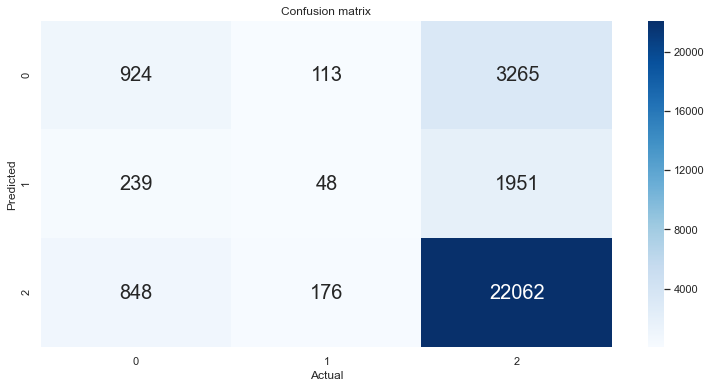

In [64]:
forest_clf = RandomForestClassifier()

forest_clf_cnt,classifier_comp = model_build_evaluate(forest_clf,X_train_cnt,y_train,X_test_cnt,y_test,
                                              'Random Forest','Count Vectorizer',classifier_comp)

forest_clf_tfidf,classifier_comp = model_build_evaluate(forest_clf,X_train_tfidf,y_train,X_test_tfidf,y_test,
                                              'Random Forest','TF-IDF Vectorizer',classifier_comp)

forest_clf_w2v,classifier_comp = model_build_evaluate(forest_clf,X_train_vectorized_df,y_train,X_test_vectorized_df,y_test,
                                              'Random Forest','Word2Vec',classifier_comp)

### XGBoost Classifier

Train accuracy of XGBoost ClassifierClassifier with Count Vectorizer is 0.8073924050632911
Test  accuracy of XGBoost ClassifierClassifier with Count Vectorizer is 0.8048673462499156

Classification report is :
              precision    recall  f1-score   support

           0       0.83      0.19      0.31      4302
           1       0.54      0.02      0.04      2238
           2       0.81      1.00      0.89     23086

    accuracy                           0.80     29626
   macro avg       0.72      0.40      0.41     29626
weighted avg       0.79      0.80      0.74     29626



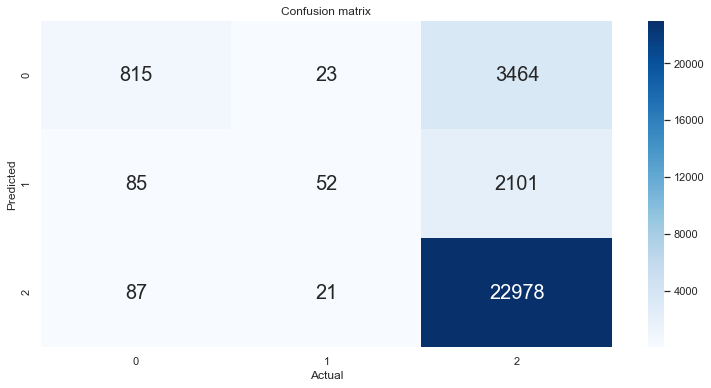

Train accuracy of XGBoost ClassifierClassifier with TF-IDF Vectorizer is 0.808675105485232
Test  accuracy of XGBoost ClassifierClassifier with TF-IDF Vectorizer is 0.8057449537568352

Classification report is :
              precision    recall  f1-score   support

           0       0.84      0.19      0.31      4302
           1       0.61      0.02      0.04      2238
           2       0.80      1.00      0.89     23086

    accuracy                           0.81     29626
   macro avg       0.75      0.40      0.42     29626
weighted avg       0.80      0.81      0.74     29626



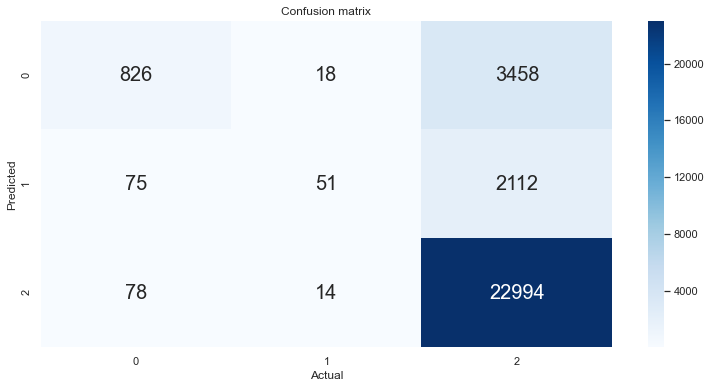

Train accuracy of XGBoost ClassifierClassifier with Word2Vec is 0.8092489451476793
Test  accuracy of XGBoost ClassifierClassifier with Word2Vec is 0.8059474785661244

Classification report is :
              precision    recall  f1-score   support

           0       0.71      0.24      0.36      4302
           1       0.38      0.00      0.01      2238
           2       0.81      0.99      0.89     23086

    accuracy                           0.81     29626
   macro avg       0.63      0.41      0.42     29626
weighted avg       0.76      0.81      0.75     29626



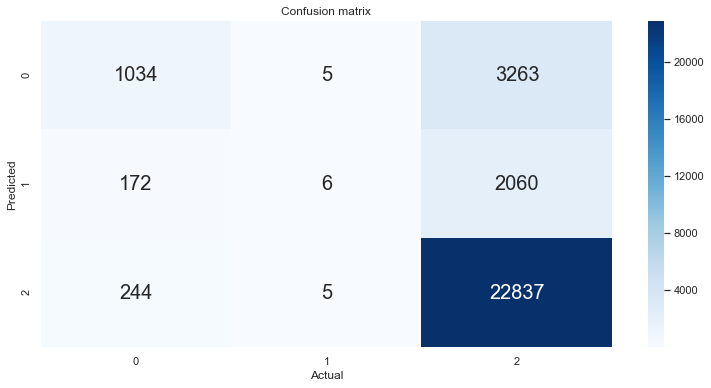

In [65]:
xgb_clf = XGBClassifier(objective='multi:softmax')

xgb_clf_cnt,classifier_comp = model_build_evaluate(xgb_clf,X_train_cnt,y_train,X_test_cnt,y_test,
                                              'XGBoost Classifier','Count Vectorizer',classifier_comp)

xgb_clf_tfidf,classifier_comp = model_build_evaluate(xgb_clf,X_train_tfidf,y_train,X_test_tfidf,y_test,
                                              'XGBoost Classifier','TF-IDF Vectorizer',classifier_comp)

xgb_clf_w2v,classifier_comp = model_build_evaluate(xgb_clf,X_train_vectorized_df,y_train,X_test_vectorized_df,y_test,
                                              'XGBoost Classifier','Word2Vec',classifier_comp)

In [66]:
classifier_comp

,Classifier,Word Embeddings,Train Accuracy,Test Accuracy,f1 score
0,Multinomial Naive Bayes,Count Vectorizer,0.814774,0.794674,"[0.61, 0.3, 0.89]"
1,Multinomial Naive Bayes,TF-IDF Vectorizer,0.825373,0.820090,"[0.46, 0.02, 0.9]"
2,Logistic Regression,Count Vectorizer,0.901513,0.843482,"[0.65, 0.23, 0.92]"
3,Logistic Regression,TF-IDF Vectorizer,0.867398,0.851819,"[0.65, 0.14, 0.92]"
4,Logistic Regression,Word2Vec,0.820276,0.819955,"[0.49, 0.01, 0.9]"
5,Random Forest,Count Vectorizer,0.992000,0.815027,"[0.49, 0.07, 0.9]"
6,Random Forest,TF-IDF Vectorizer,0.991876,0.818234,"[0.49, 0.06, 0.9]"
7,Random Forest,Word2Vec,0.992135,0.777493,"[0.29, 0.04, 0.88]"
8,XGBoost Classifier,Count Vectorizer,0.807392,0.804867,"[0.31, 0.04, 0.89]"
9,XGBoost Classifier,TF-IDF Vectorizer,0.808675,0.805745,"[0.31, 0.04, 0.89]"


In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smt1 = SMOTE()
X_train_cnt_smt,y_train_smt=smt1.fit_sample(X_train_cnt,y_train)
smt2 = SMOTE()
X_train_tfidf_smt,y_train_smt_tfidf=smt2.fit_sample(X_train_tfidf,y_train)
smt3 = SMOTE()
X_train_w2v_smt,y_train_smt_w2v=smt3.fit_sample(X_train_vectorized_df,y_train)

Train accuracy of Logistic RegressionClassifier with Count Vectorizer is 0.7912557575407541
Test  accuracy of Logistic RegressionClassifier with Count Vectorizer is 0.8007493417943699

Classification report is :
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      4302
           1       0.24      0.29      0.26      2238
           2       0.91      0.88      0.89     23086

    accuracy                           0.80     29626
   macro avg       0.58      0.61      0.59     29626
weighted avg       0.82      0.80      0.81     29626



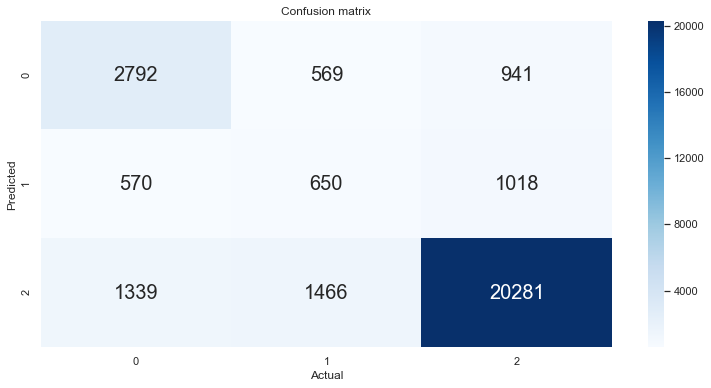

Train accuracy of Logistic RegressionClassifier with TF-IDF Vectorizer is 0.8626468563947808
Test  accuracy of Logistic RegressionClassifier with TF-IDF Vectorizer is 0.7836359954094376

Classification report is :
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      4302
           1       0.24      0.48      0.32      2238
           2       0.95      0.83      0.88     23086

    accuracy                           0.78     29626
   macro avg       0.60      0.67      0.62     29626
weighted avg       0.84      0.78      0.81     29626



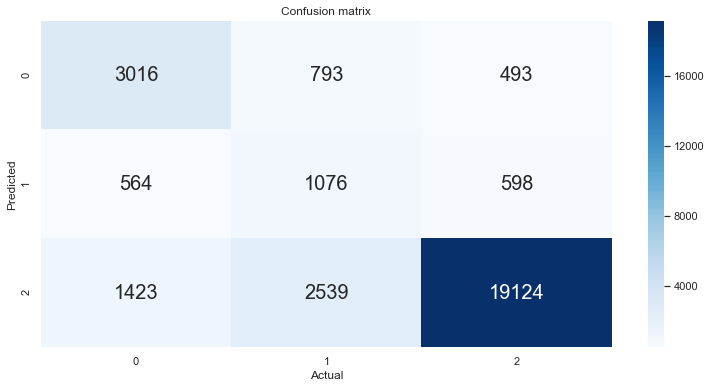

Train accuracy of Logistic RegressionClassifier with Word2Vec is 0.6860341433597567
Test  accuracy of Logistic RegressionClassifier with Word2Vec is 0.7096806858840208

Classification report is :
              precision    recall  f1-score   support

           0       0.49      0.66      0.56      4302
           1       0.20      0.50      0.28      2238
           2       0.94      0.74      0.83     23086

    accuracy                           0.71     29626
   macro avg       0.54      0.63      0.56     29626
weighted avg       0.82      0.71      0.75     29626



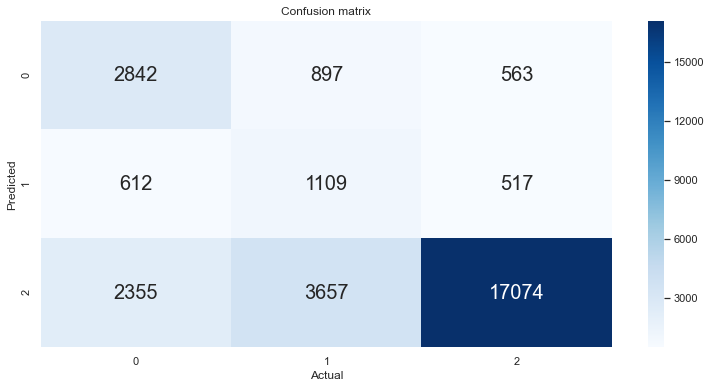

In [69]:
logreg_clf_cnt,classifier_comp = model_build_evaluate(LogisticRegression(),X_train_cnt_smt,y_train_smt,X_test_cnt,y_test,
                                              'Logistic Regression','Count Vectorizer',classifier_comp)

logreg_clf_tfidf,classifier_comp = model_build_evaluate(LogisticRegression(),X_train_tfidf_smt,y_train_smt_tfidf,X_test_tfidf,y_test,
                                              'Logistic Regression','TF-IDF Vectorizer',classifier_comp)

logreg_clf_w2v,classifier_comp = model_build_evaluate(LogisticRegression(),X_train_w2v_smt,y_train_smt_w2v,X_test_vectorized_df,y_test,
                                              'Logistic Regression','Word2Vec',classifier_comp)

## Deep Learning Algorithms

### Dense Neural Network

In [93]:
tokenizer_obj = Tokenizer()
total_reviews = list(X_train.values)+list(X_test.values)
max_len = 100
tokenizer_obj.fit_on_texts(total_reviews)
X_train_seq = tokenizer_obj.texts_to_sequences(X_train)
X_test_seq = tokenizer_obj.texts_to_sequences(X_test)
X_train_seq = pad_sequences(X_train_seq,padding='post',maxlen=max_len)
X_test_seq = pad_sequences(X_test_seq,padding='post',maxlen=max_len)
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
vocab_size = len(tokenizer_obj.word_index) + 1
Embedding_dim = 200

In [94]:
model = Sequential()
model.add(Embedding(vocab_size,Embedding_dim,input_length=max_len))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          10485800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [90]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
,callbacks = [early_stopping]

In [96]:
history = model.fit(X_train_seq,one_hot_train_labels,batch_size=64,epochs=15,
                    validation_data=(X_test_seq,one_hot_test_labels))

Train on 88875 samples, validate on 29626 samples
Epoch 1/15
88875/88875 [==============================] - 260s 3ms/step - loss: 0.4869 - accuracy: 0.8284 - val_loss: 0.4352 - val_accuracy: 0.8438
Epoch 2/15
88875/88875 [==============================] - 261s 3ms/step - loss: 0.3711 - accuracy: 0.8651 - val_loss: 0.4748 - val_accuracy: 0.8357
Epoch 3/15
88875/88875 [==============================] - 261s 3ms/step - loss: 0.2635 - accuracy: 0.9042 - val_loss: 0.5907 - val_accuracy: 0.8283
Epoch 4/15
88875/88875 [==============================] - 260s 3ms/step - loss: 0.1757 - accuracy: 0.9373 - val_loss: 0.9838 - val_accuracy: 0.8255
Epoch 5/15
88875/88875 [==============================] - 261s 3ms/step - loss: 0.1202 - accuracy: 0.9586 - val_loss: 0.9356 - val_accuracy: 0.8078
Epoch 6/15
88875/88875 [==============================] - 263s 3ms/step - loss: 0.0849 - accuracy: 0.9719 - val_loss: 1.2672 - val_accuracy: 0.8244
Epoch 7/15
88875/88875 [==============================] - 262s

In [97]:
with open('Neural_network_model', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

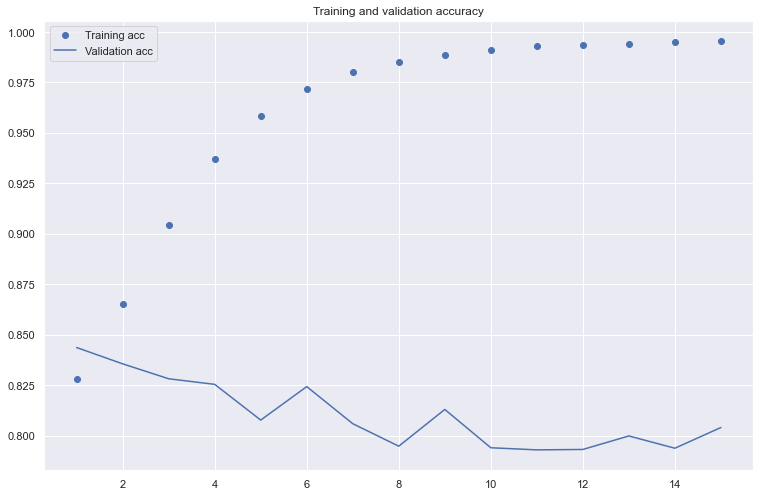

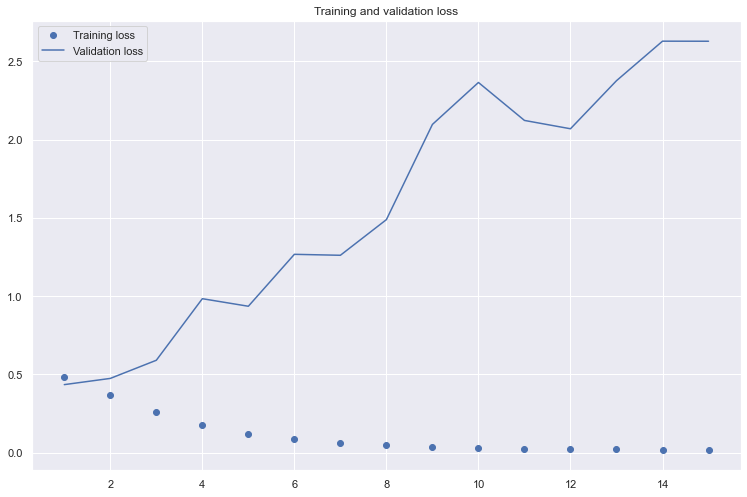

In [98]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Recurrent Neural Networks (LSTM)

In [99]:
model = Sequential()
model.add(Embedding(vocab_size,Embedding_dim,input_length=max_len))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 200)          10485800  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 10,662,699
Trainable params: 10,662,699
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [102]:
history1 = model.fit(X_train_seq,one_hot_train_labels,batch_size=64,epochs=20,
                    validation_data=(X_test_seq,one_hot_test_labels),callbacks = [early_stopping])

Train on 88875 samples, validate on 29626 samples
Epoch 1/20
88875/88875 [==============================] - 589s 7ms/step - loss: 0.6686 - accuracy: 0.7788 - val_loss: 0.6104 - val_accuracy: 0.7936
Epoch 2/20
88875/88875 [==============================] - 573s 6ms/step - loss: 0.6041 - accuracy: 0.7910 - val_loss: 0.5733 - val_accuracy: 0.8125
Epoch 3/20
88875/88875 [==============================] - 541s 6ms/step - loss: 0.5755 - accuracy: 0.8014 - val_loss: 0.5108 - val_accuracy: 0.8159
Epoch 4/20
88875/88875 [==============================] - 529s 6ms/step - loss: 0.4636 - accuracy: 0.8320 - val_loss: 0.4325 - val_accuracy: 0.8429
Epoch 5/20
88875/88875 [==============================] - 544s 6ms/step - loss: 0.4157 - accuracy: 0.8487 - val_loss: 0.4376 - val_accuracy: 0.8464
Epoch 6/20
88875/88875 [==============================] - 549s 6ms/step - loss: 0.3918 - accuracy: 0.8585 - val_loss: 0.4135 - val_accuracy: 0.8501
Epoch 7/20
88875/88875 [==============================] - 637s

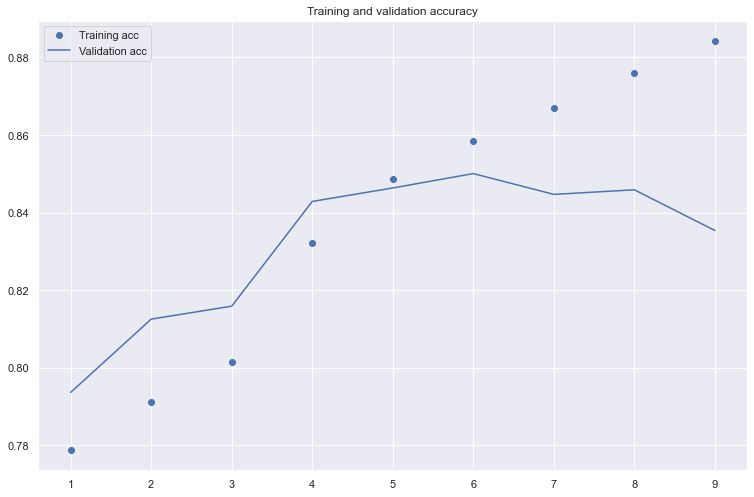

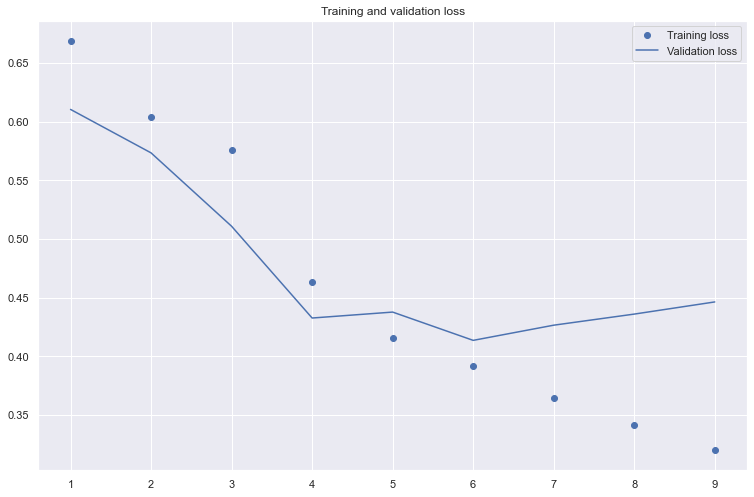

In [105]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [106]:
with open('LSTM_model', 'wb') as file_pi:
        pickle.dump(history1.history, file_pi)

### Convolutional Neural Network

In [107]:
all_reviews = clean_train_reviews+clean_test_reviews
model_w2v = Word2Vec(all_reviews,size=Embedding_dim,min_count=2)
words=list(model_w2v.wv.vocab)
model_w2v.wv.save_word2vec_format("amazon_food_reviews_word2vec.txt",binary=False)

In [152]:
embeddings_dictionary = dict()
embedding_file = open('amazon_food_reviews_word2vec.txt', encoding="utf8")

for line in embedding_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
embedding_file.close()

In [153]:
embedding_matrix = np.zeros((vocab_size, Embedding_dim))
for word, index in tokenizer_obj.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [154]:
model = Sequential()
model.add(Embedding(vocab_size,Embedding_dim,input_length=max_len,
                    embeddings_initializer=Constant(embedding_matrix),trainable=False))
model.add(Conv1D(64, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.2))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [155]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          10613200  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 94, 64)            89664     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 18, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12, 32)            14368     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)               

In [156]:
history2 = model.fit(X_train_seq,one_hot_train_labels,batch_size=64,epochs=20,
                    validation_data=(X_test_seq,one_hot_test_labels))

Train on 88875 samples, validate on 29626 samples
Epoch 1/20
88875/88875 [==============================] - 135s 2ms/step - loss: 0.4972 - accuracy: 0.8185 - val_loss: 0.4604 - val_accuracy: 0.8318
Epoch 2/20
88875/88875 [==============================] - 84s 940us/step - loss: 0.4501 - accuracy: 0.8347 - val_loss: 0.4595 - val_accuracy: 0.8361
Epoch 3/20
88875/88875 [==============================] - 92s 1ms/step - loss: 0.4301 - accuracy: 0.8418 - val_loss: 0.4318 - val_accuracy: 0.8426
Epoch 4/20
88875/88875 [==============================] - 93s 1ms/step - loss: 0.4156 - accuracy: 0.8467 - val_loss: 0.4424 - val_accuracy: 0.8363
Epoch 5/20
88875/88875 [==============================] - 90s 1ms/step - loss: 0.4025 - accuracy: 0.8516 - val_loss: 0.4475 - val_accuracy: 0.8358
Epoch 6/20
88875/88875 [==============================] - 96s 1ms/step - loss: 0.3896 - accuracy: 0.8560 - val_loss: 0.4424 - val_accuracy: 0.8427
Epoch 7/20
88875/88875 [==============================] - 90s 1ms

In [157]:
with open('TextCNN_word2vec_model', 'wb') as file_pi:
        pickle.dump(history2.history, file_pi)

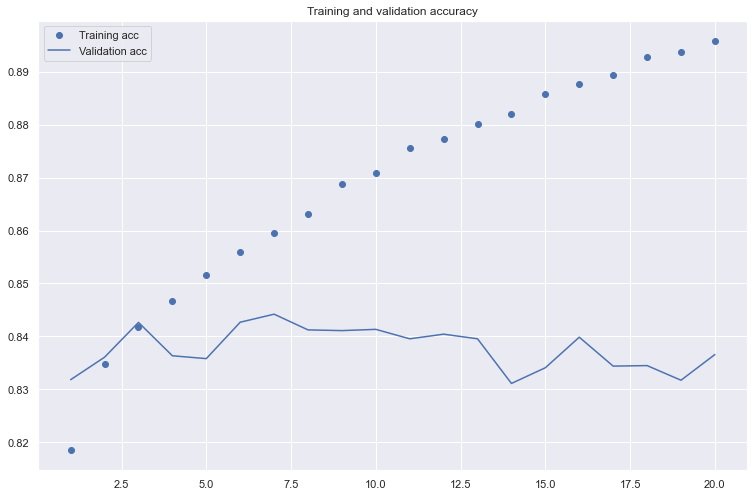

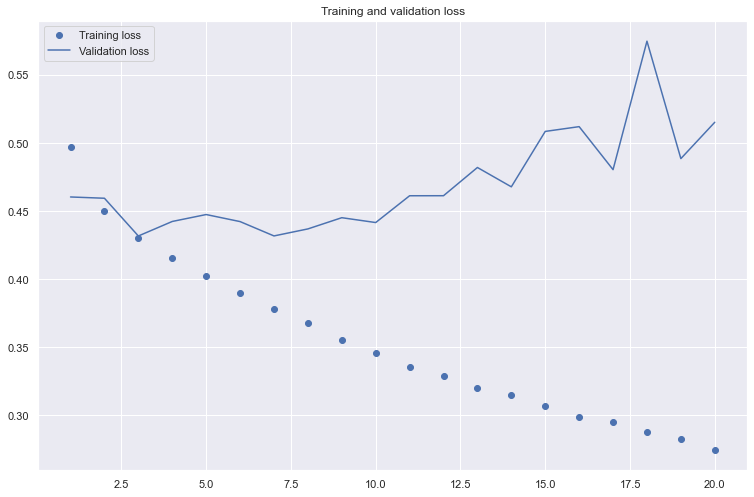

In [158]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()